# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Лушин Евгений Александрович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| **Алгоритм Дейкстры** | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [1]:
%matplotlib inline
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module networkx has no attribute draw_node

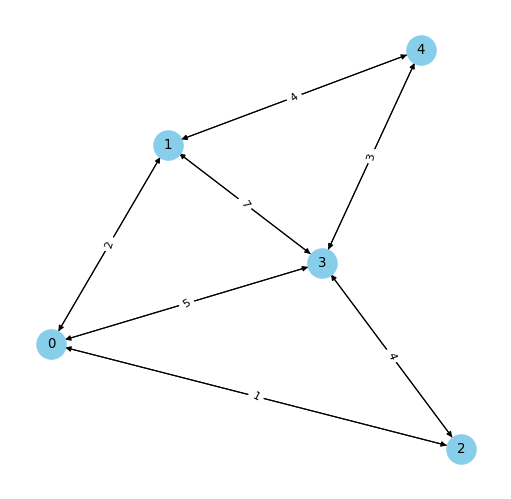

In [5]:
#Графический вывод графа
def printGraph(input, start_position = 0):
    # Cria os nodes
    G = nx.DiGraph()
    for el1, vector in enumerate(input):
        for el2, w in enumerate(vector):
            if w > 0: G.add_edge(el1, el2, weight=w)
    edge_labels = dict(((u,v), d['weight']) for u, v, d in G.edges(data=True))
    node_labels = {node:node for node in G.nodes()}

    # Increase the size
    plt.figure(num=None, figsize=(8, 8), dpi=80)

    # Draw the basic
    pos = nx.spring_layout(G)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
        
    nx.draw(G, pos, node_size = 700, node_color = '#87CEEB')
    nx.draw_node(start_position, pos, node_size = 900, node_color = '8B00FF')
    plt.show()

#Чтение из файла
def read_matrix(filename):
    my_file = open(filename, 'r', encoding = "utf-8")
    matrix = []
    for line in my_file:
        node = line.split()
        temp = []
        for element in node:
            temp.append(int(element))
        matrix.append(temp)
    my_file.close()
    return matrix

#Перебор всех связных вершин
def get_link_V(stat_position, matrix):
    for i, weight in enumerate(matrix[stat_position]):
        if weight > 0:
            yield i

#Вершина с минимальным весом            
def arg_min(T, S):
    amin = -1
    m = max(T)
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i
    return amin

#Алгоритм поиска кратчайшего пути Дейкстра
def Dijkstra(matrix, stat_position):
    N = len(matrix) #Число вершин в графе
    T = [math.inf]*N #Последняя строчка таблицы
#    V = 2 #Стартовая вершина
    S = {stat_position} #Множество просмотренных вершин
    T[stat_position] = 0 #Начальный вес стартовой вершины
    
    #Цикл, пока не просмотрит все вершины
    while stat_position != -1:
        for j in get_link_V(stat_position, matrix): #Перебираем все вершины связанные с вершиной V
            if j not in S:
                weight = T[stat_position]+matrix[stat_position][j]
                if weight < T[j]:
                    T[j] = weight
        stat_position = arg_min(T, S)
        if stat_position >= 0:
            S.add(stat_position)
    print(T)
    
matrix = read_matrix('c:\\Users\\lushi\\Рабочий стол\\graph.txt')
printGraph(matrix)
Dijkstra(matrix, 4)

### Вывод